## A Comparative Study of Linear Regression and KNeighbors Regression
Comparing the predictive power of 2 most popular algorithms for supervised learning (continuous target) using the cruise ship dataset

Author: Benjamin O. Tayo
Date: 5/6/2020

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('slr', LinearRegression())])
knn_lr = KNeighborsRegressor(n_neighbors = 3)

# 2. Read dataset and select predictor and target variables

In [2]:
df=pd.read_csv("cruise_ship_info.csv")
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
sc_y = StandardScaler()
train_score_lr = []
train_score_knn =  []

# 3. Model Building and Evaluation

In [3]:
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    train_score_lr = np.append(train_score_lr, np.mean(cross_val_score(pipe_lr, X_train, y_train_std, scoring ='r2' , cv = 10)))
    train_score_knn = np.append(train_score_knn, np.mean(cross_val_score(knn_lr, X_train, y_train_std, scoring ='r2' , cv = 10)))

In [4]:
train_mean_lr = np.mean(train_score_lr)
train_std_lr = np.std(train_score_lr)
train_mean_knn = np.mean(train_score_knn)
train_std_knn = np.std(train_score_knn)

In [5]:
print('R2 train for lr: %.3f +/- %.3f' % (train_mean_lr,train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' % (train_mean_knn,train_std_knn))

R2 train for lr: 0.914 +/- 0.013
R2 train for knn_lr: 0.843 +/- 0.033


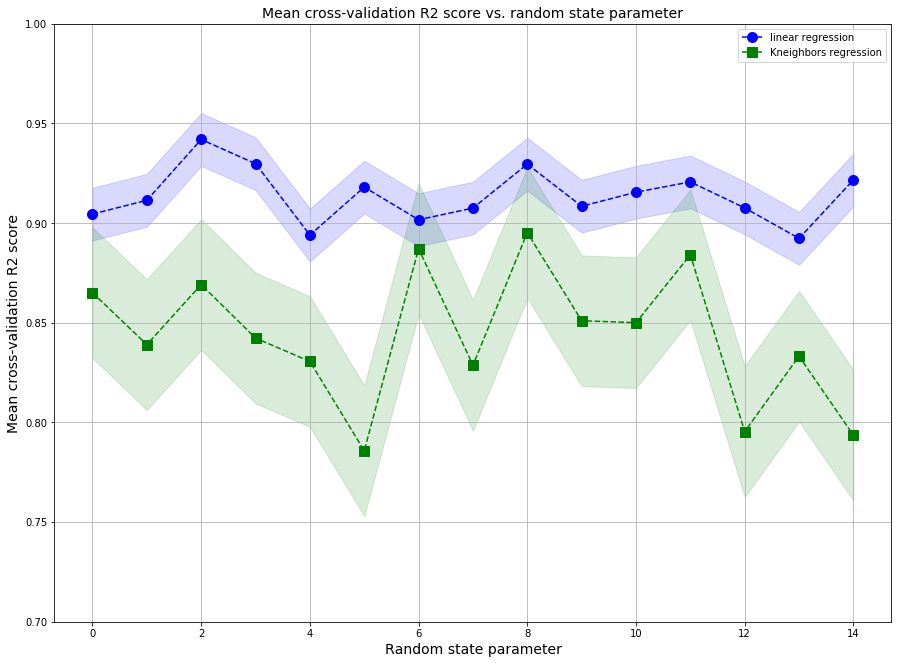

In [6]:
plt.figure(figsize=(15,11))
plt.plot(range(n),train_score_lr,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10, label= 'linear regression')
plt.fill_between(range(n),
                 train_score_lr + train_std_lr,
                 train_score_lr - train_std_lr,
                 alpha=0.15, color='blue')

plt.plot(range(n),train_score_knn,color='green', linestyle='dashed', marker='s',markerfacecolor='green', markersize=10, label = 'Kneighbors regression')
plt.fill_between(range(n),
                 train_score_knn + train_std_knn,
                 train_score_knn - train_std_knn,
                 alpha=0.15, color='green')

plt.grid()
plt.ylim(0.7,1)
plt.title ('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 score', size = 14)
plt.legend()
plt.show()